### NOT-MNIST

###### http://yaroslavvb.blogspot.in/2011/09/notmnist-dataset.html  (data) 

In [14]:
import numpy as np
import pandas as pd
from keras.models import Sequential,Model
from keras.layers import Dropout ,Activation,AveragePooling2D, normalization,Convolution2D,MaxPooling2D
from keras.layers import Dense, Flatten, Reshape, Input
from keras.utils import np_utils
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
X_train = np.load('X_NOTMN.npy')
Y_train = np.load('Y_NOTMN.npy')

In [23]:
X_train = X_train/255.0
Y_train = np_utils.to_categorical(Y_train)
print X_train.shape, Y_train.shape

(18724, 28, 28) (18724, 10)


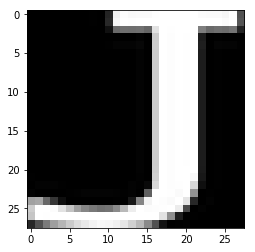

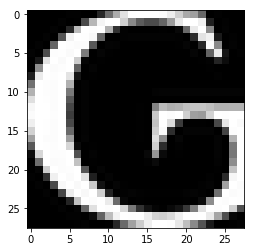

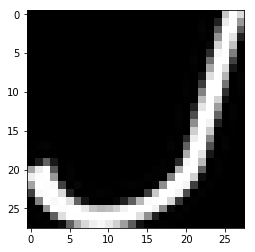

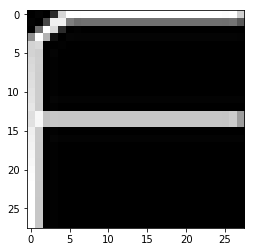

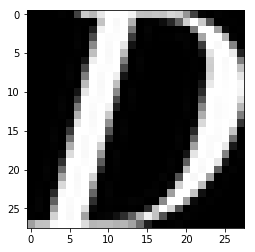

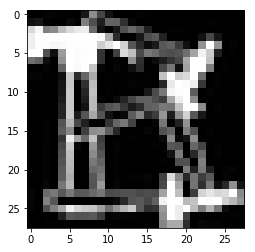

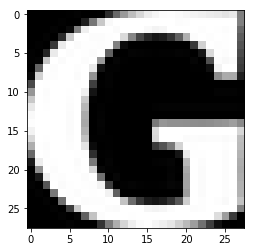

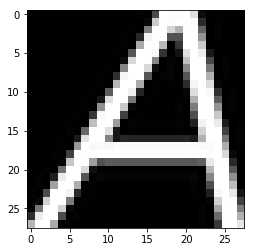

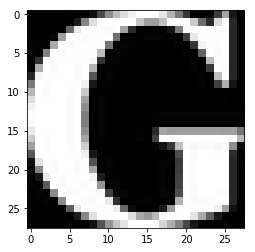

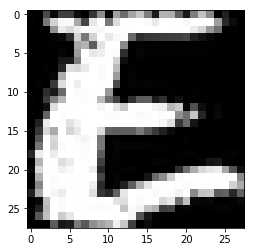

In [24]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_train[ix], interpolation='none', cmap='gray')
plt.show()

In [25]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))

In [28]:

inp = Input(shape=(28,28,1))
x1 = Convolution2D( 32,(5,5))(inp)

r1_a1 = Activation('relu')(x1)
r1_w1 = Convolution2D(32,( 5,5))(r1_a1)
r1_a2 = Activation('relu')(r1_w1)
r1_d1 = Dropout(0.2)(r1_a2)
r1_w2 = Convolution2D(32,( 5,5))(r1_d1)

x2 = Convolution2D(8,( 5,5))(r1_w2)
acti = Activation('relu')(x2)
av_pool = MaxPooling2D((2,2))((acti))
f1 = Flatten()(av_pool)
fc1 = Dense(32)(f1)
a1 = Activation('relu')(fc1)
fc3 = Dense(10)(a1)
a3 = Activation('softmax')(fc3)

model = Model(outputs=a3, inputs=inp)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
activation_28 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
activation_29 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 32)        25632     
__________

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
hist = model.fit(X_train,Y_train,
                 epochs=25,
                 shuffle=True,
                 batch_size=256,
                 validation_split=0.20)

Train on 14979 samples, validate on 3745 samples
Epoch 1/25
14979/14979 [==============================] - 15s - loss: 1.9076 - acc: 0.3293 - val_loss: 1.3167 - val_acc: 0.5688
Epoch 2/25
14979/14979 [==============================] - 15s - loss: 1.0788 - acc: 0.6490 - val_loss: 1.0230 - val_acc: 0.6750
Epoch 3/25
14979/14979 [==============================] - 15s - loss: 0.9155 - acc: 0.7151 - val_loss: 0.8717 - val_acc: 0.7397
Epoch 4/25
14979/14979 [==============================] - 15s - loss: 0.8105 - acc: 0.7629 - val_loss: 0.7817 - val_acc: 0.7853
Epoch 5/25
14979/14979 [==============================] - 15s - loss: 0.7311 - acc: 0.7980 - val_loss: 0.7037 - val_acc: 0.8147
Epoch 6/25
14979/14979 [==============================] - 15s - loss: 0.6671 - acc: 0.8154 - val_loss: 0.6570 - val_acc: 0.8256
Epoch 7/25
14979/14979 [==============================] - 15s - loss: 0.6135 - acc: 0.8332 - val_loss: 0.6114 - val_acc: 0.8411
Epoch 8/25
14979/14979 [==============================]

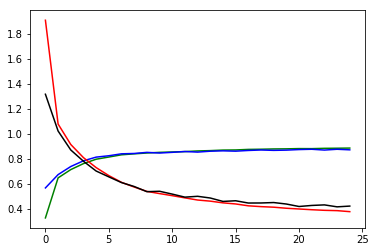

In [32]:
plt.plot(hist.history['acc'],'g')
plt.plot(hist.history['val_acc'],'b')
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'black')